<a href="https://colab.research.google.com/github/dileepadrd/project-3/blob/romain/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries

In [ ]:
from IPython.core.display import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Load the data from the CSV file

In [ ]:
# Provide the path to your CSV file
data_path = '/content/Ethereum Historical Data (1).csv'

# Load the data into a DataFrame
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020",368.23,387.15,415.08,335.76,16.78M,-4.88%
1,"Aug 01, 2020",387.14,346.48,392.37,343.33,11.03M,11.73%
2,"Jul 31, 2020",346.51,334.84,349.34,329.02,8.69M,3.48%
3,"Jul 30, 2020",334.87,317.79,341.11,314.83,9.07M,5.36%
4,"Jul 29, 2020",317.82,316.95,324.93,312.64,8.72M,0.27%


Data preprocessing and feature selection

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Select the relevant features for analysis
selected_features = ['Year', 'Month', 'Day', 'Open', 'High', 'Low']
df_selected = df[selected_features].copy()

# Preprocess the target variable
df_selected['Price'] = df['Price'].str.replace(',', '').astype(float)

# Display the updated DataFrame
df_selected.head()

,Year,Month,Day,Open,High,Low,Price
0,2020,8,2,387.15,415.08,335.76,368.23
1,2020,8,1,346.48,392.37,343.33,387.14
2,2020,7,31,334.84,349.34,329.02,346.51
3,2020,7,30,317.79,341.11,314.83,334.87
4,2020,7,29,316.95,324.93,312.64,317.82


Exploratory data analysis and visualization

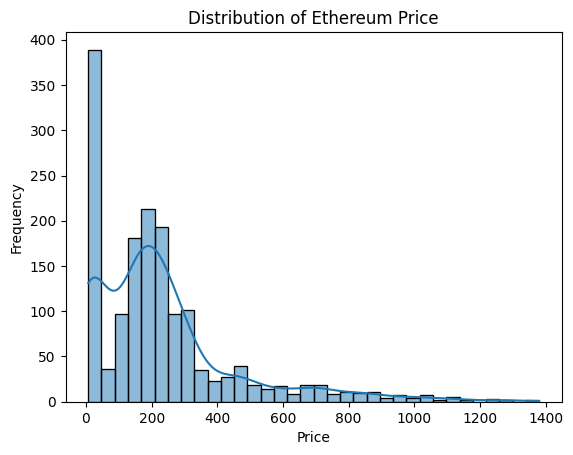

<ipython-input-4-2488f5fb67ad>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_selected.corr()


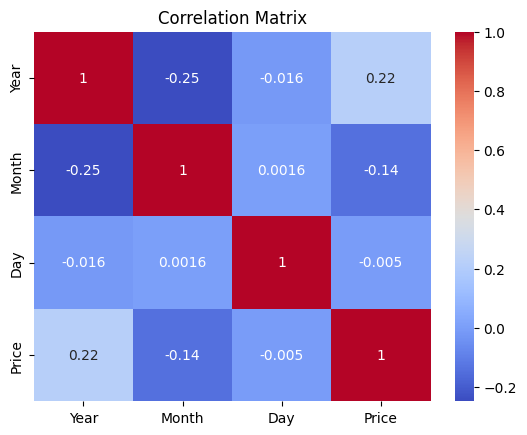

In [ ]:
# Generate descriptive statistics
df_selected.describe()

# Visualize the distribution of the target variable
sns.histplot(df_selected['Price'], kde=True)
plt.title('Distribution of Ethereum Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a correlation matrix
corr_matrix = df_selected.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(df_selected.columns)


Index(['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Price'], dtype='object')


Building a predictive model (Linear Regression)

In [ ]:
# Convert columns to numeric type
df_selected['Open'] = df_selected['Open'].str.replace(',', '').astype(float)
df_selected['High'] = df_selected['High'].str.replace(',', '').astype(float)
df_selected['Low'] = df_selected['Low'].str.replace(',', '').astype(float)

# Split the data into features and target variable
X = df_selected[['Year', 'Month', 'Day', 'Open', 'High', 'Low']].values
y = df_selected['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)


Mean Squared Error: 44.402674083665055
Root Mean Squared Error: 6.663533153190209
R-squared: 0.9989071585815948


The model seems to perform well with a low mean squared error (MSE), root mean squared error (RMSE), and a high R-squared value. This indicates that the model is able to explain a significant portion of the variance in the test data.

The MSE of 44.40 suggests that, on average, the squared difference between the predicted and actual prices is 44.40. The RMSE of 6.66 indicates that, on average, the model's predictions have a deviation of approximately 6.66 from the actual prices.

The R-squared value of 0.9989 indicates that around 99.89% of the variance in the test data can be explained by the linear regression model. This suggests that the model fits the data very well.

 Gradient Boosting Regression

In [ ]:
# Split the data into features and target variable
X = df_selected[['Year', 'Month', 'Day', 'Open', 'High', 'Low']]
y = df_selected['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Regression model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 79.79170170516349
Root Mean Squared Error: 8.93262009184111
Mean Absolute Error: 4.715479763504807
R-squared: 0.9980361615990936


The low values of MSE, RMSE, and MAE indicate that the model has good predictive performance. Additionally, the high R-squared value of 0.9980168955769715 suggests that the model explains a significant portion of the variance in the target variable.

Overall, these results indicate that the Gradient Boosting Regression model is a good fit for the dataset and can make accurate predictions of the target variable.